codes à faire tourner pour installer R à chaque fois:

dans un terminal R:
install.packages('IRkernel')

puis dans le terminal normal: pip install jupyter

puis re dans terminal R:
IRkernel::installspec(user = TRUE)

A mettre en annexe:

le choix du format: le choix d'un format ts plutôt que zoo..

Préparation base

In [31]:
# chargement de packages
install.packages("zoo")
install.packages("tseries")
# install.packages("forecast")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
library(zoo)
library(tseries)
# library(forecast)
library(ggplot2)

In [16]:
# import des données

data <- read.csv("/home/onyxia/work/Series_temporelles/valeurs_mensuelles.csv", header = FALSE, sep = ";")

In [27]:
# préparation de la série

xm.source <- zoo(data[[2]]) #converts the first data element en "zoo"
T <- length(xm.source)
xm <- xm.source[1:T]
xm_ts <- ts(xm, start = c(1990, 1), frequency = 12)

In [18]:
print(xm)

     1      2      3      4      5      6      7      8      9     10     11 
 90.30  90.54  96.84  91.88  82.97  90.77  87.57  91.49  91.34  97.57  99.35 
    12     13     14     15     16     17     18     19     20     21     22 
 99.15 100.01 102.66 100.87 103.31 103.54 101.33 109.69 100.06 104.87 101.77 
    23     24     25     26     27     28     29     30     31     32     33 
 99.85 102.82 102.28 101.86 104.09 108.39 110.02 114.86 110.56 110.57 108.72 
    34     35     36     37     38     39     40     41     42     43     44 
100.90 105.59 107.08 108.69 105.03 103.89 102.52 107.54 100.83 101.52 101.43 
    45     46     47     48     49     50     51     52     53     54     55 
 96.94  95.65  97.00 102.40  94.18  96.10 102.05 122.79 122.90 132.80 115.79 
    56     57     58     59     60     61     62     63     64     65     66 
115.10 113.88 112.51 113.80 112.52 120.30 116.50 113.91 111.78 114.57 112.62 
    67     68     69     70     71     72     73     74     75  

In [28]:
print(xm_ts)

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1990  90.30  90.54  96.84  91.88  82.97  90.77  87.57  91.49  91.34  97.57
1991 100.01 102.66 100.87 103.31 103.54 101.33 109.69 100.06 104.87 101.77
1992 102.28 101.86 104.09 108.39 110.02 114.86 110.56 110.57 108.72 100.90
1993 108.69 105.03 103.89 102.52 107.54 100.83 101.52 101.43  96.94  95.65
1994  94.18  96.10 102.05 122.79 122.90 132.80 115.79 115.10 113.88 112.51
1995 120.30 116.50 113.91 111.78 114.57 112.62 115.49 118.11 121.60 123.86
1996 121.70 124.96 122.80 121.33 127.90 123.33 119.82 119.25 111.54 126.37
1997 119.08 126.90 123.98 126.73 126.25 130.26 131.52 130.31 130.96 125.19
1998 133.12 128.83 132.50 135.18 136.18 137.26 136.14 136.26 118.83 129.45
1999 124.76 124.57 128.20 119.20 115.65 124.12 127.31 124.60 135.66 132.39
2000 132.79 138.66 137.43 146.59 135.94 133.20 127.99 134.19 136.43 132.57
2001 132.13 129.22 125.06 129.85 124.03 122.45 127.65 128.00 124.78 130.49
2002 125.89 124.19 117.62

PARTIE 1

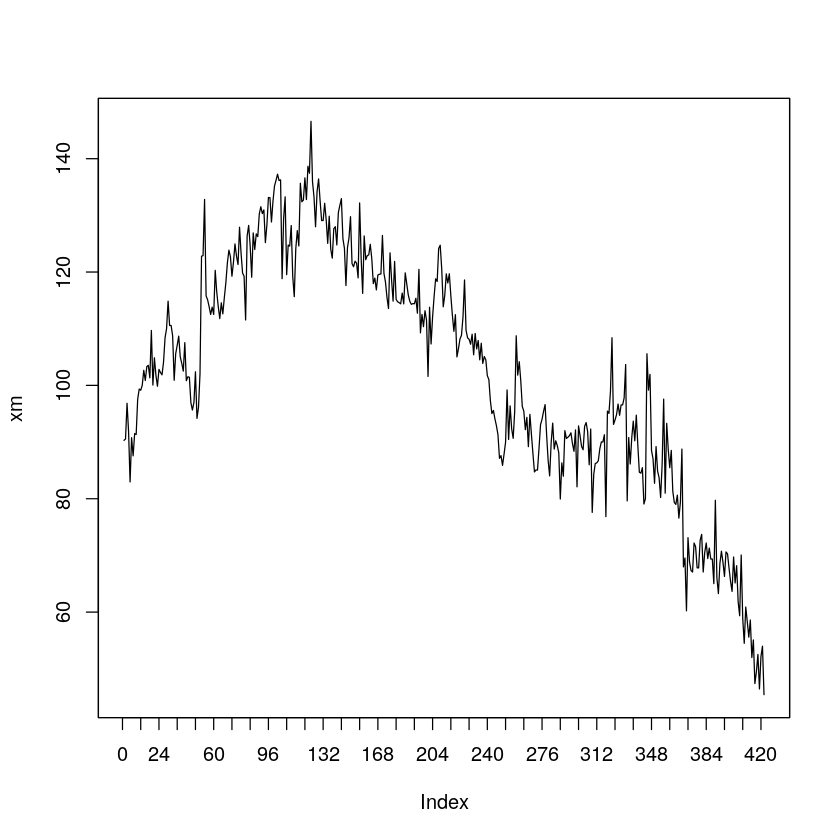

In [ ]:
# Part 1

# question 1
plot(xm_ts, xaxt="n") #represents xm_ts
axis(side=1,at=seq(0,422,12)) #prints the x-axis in 12 by 0 to 422

faudra écrire interprétation.. à faire dans le rapport.
Description:
- Un indice chiffré par mois (ex : janvier 2019 à mars 2025) représentant le niveau de production dans le secteur Préparation de jus de fruits et légumes (code NAF 10.32).
- Base 100 en 2021 : cela signifie que l’année 2021 est le point de référence (indice = 100 en moyenne cette année-là).

Ne pas oublier d'indiquer la source, la régularité des données observées et de quand à quand elles le sont

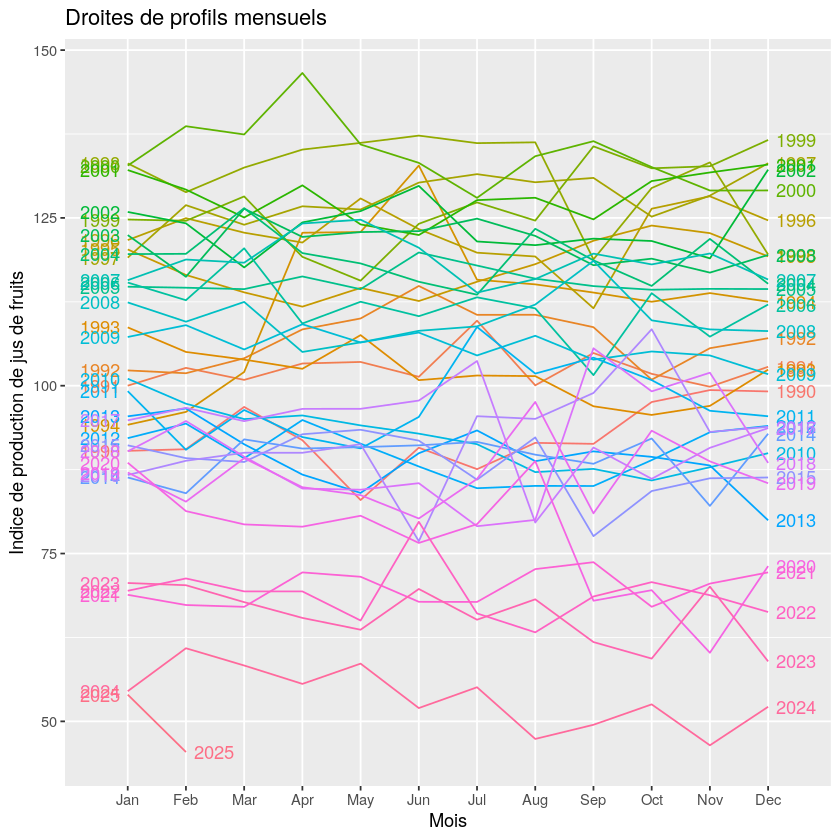

In [34]:
# observations: on regarde s'il y a une forme de saisonnalité 
# ( il ne devrait pas y en avoir car la série devrait avoir été désaisonnée)

ggseasonplot(xm_ts, year.labels=TRUE, year.labels.left=TRUE) +
  ylab("Indice de production de jus de fruits") +
  xlab("Mois") +
  ggtitle("Droites de profils mensuels")

Manifestement pas de saisonnalité. Mettre en annexe ?

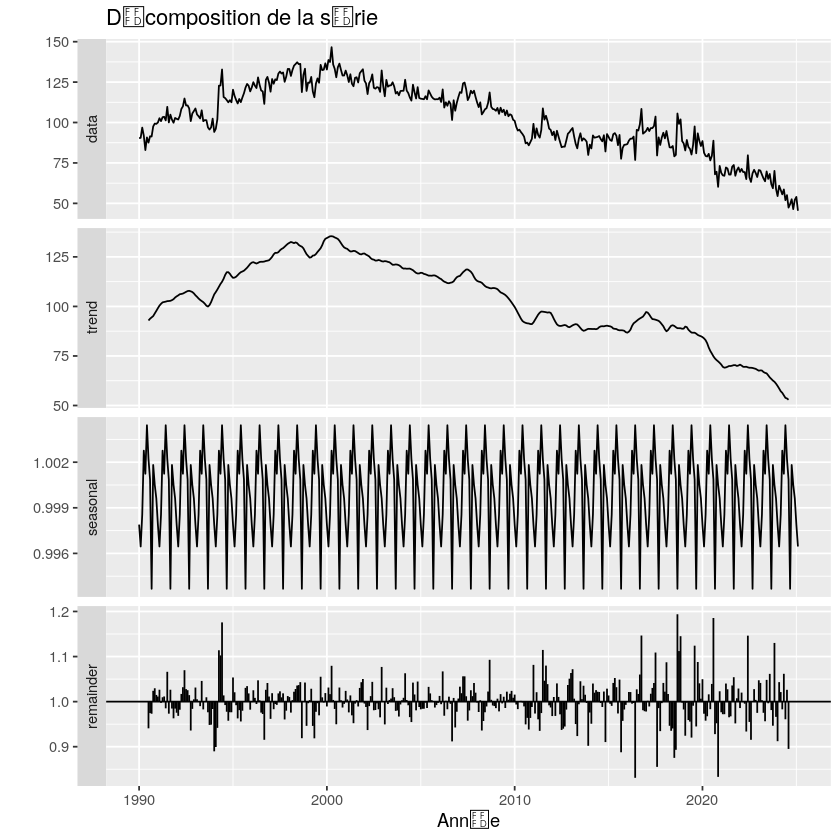

In [35]:
# Question 2

# tout d'abord, analysons la trend
xm_trend <- decompose(xm_ts,type="multiplicative")
autoplot(xm_trend, main = "D�composition de la s�rie", xlab ="Ann�e")

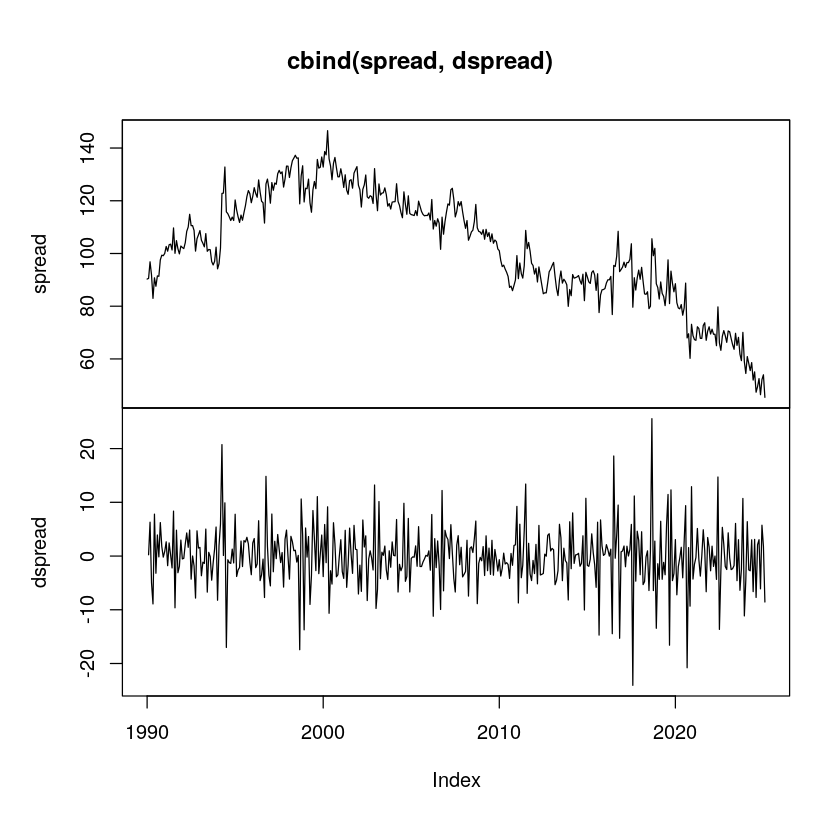

In [42]:
# première différenciation. La série semble déjà maintenant stationnaire..

dates <- as.yearmon(seq(from=1990,to=2025+1/12,by=1/12)) #index des dates pour spread
spread <- zoo(xm,order.by=dates)
dspread <- diff(spread,1) #diff ́erence premi`ere
plot(cbind(spread,dspread))

In [41]:
# on choisit de garder que les valeurs à partir de 2000 pour avoir une tendance linéaire
index(xm) <- as.yearmon(seq(from=1990,to=2025+1/12,by=1/12))
xm_2000 <- xm[index(xm) >= as.yearmon("2000-01")]

In [43]:
print(xm_2000)

Jan 2000 Feb 2000 Mar 2000 Apr 2000 May 2000 Jun 2000 Jul 2000 Aug 2000 
  132.79   138.66   137.43   146.59   135.94   133.20   127.99   134.19 
Sep 2000 Oct 2000 Nov 2000 Dec 2000 Jan 2001 Feb 2001 Mar 2001 Apr 2001 
  136.43   132.57   129.08   129.09   132.13   129.22   125.06   129.85 
May 2001 Jun 2001 Jul 2001 Aug 2001 Sep 2001 Oct 2001 Nov 2001 Dec 2001 
  124.03   122.45   127.65   128.00   124.78   130.49   131.77   132.95 
Jan 2002 Feb 2002 Mar 2002 Apr 2002 May 2002 Jun 2002 Jul 2002 Aug 2002 
  125.89   124.19   117.62   124.33   126.01   129.77   121.49   120.94 
Sep 2002 Oct 2002 Nov 2002 Dec 2002 Jan 2003 Feb 2003 Mar 2003 Apr 2003 
  121.91   121.56   118.97   132.19   122.44   116.23   126.37   122.17 
May 2003 Jun 2003 Jul 2003 Aug 2003 Sep 2003 Oct 2003 Nov 2003 Dec 2003 
  122.89   123.03   124.89   122.32   117.95   118.93   116.85   119.48 
Jan 2004 Feb 2004 Mar 2004 Apr 2004 May 2004 Jun 2004 Jul 2004 Aug 2004 
  119.61   119.65   126.45   119.76   118.22   115.

In [ ]:
# Avant de continuer, centrons la série pour annuler l'effet de l'ordonnée à l'origine

la_grandeur_c <- la_grandeur - mean(la_grandeur)

# Etude de la stationnarité de la série centrée
pmax = 9

## Tests de stationnarité (Tableau 1)

## Test de Dickey-Fuller Augmenté
adf <- adfTest(la_grandeur_c, lags=pmax, type = "ct")
adf
summary(adf@test$lm)

## Test de Phillips Perron
pp.test(la_grandeur_c) 

## Test de KPSS
kpss.test(la_grandeur_c, null = "Trend") 
kpss.test(la_grandeur_c) 

## J'ai l'impression que le truc du prof c'est comme nous mais je ne suis pas une pro des series temp(On observe une série (I(1)+T) avec ADF et I(1) avec KPSS. On conclut que la série est stationnaire en différences premières

# Construction de la série différenciée
d_la_grandeur = diff(la_grandeur)
plot(d_la_grandeur)

# Tests de stationnarité de la série différenciée (Tableau 2)
## Test de Dickey-Fuller Augmenté
adf_sta <- adfTest(d_la_grandeur, lags=pmax, type = "ct")
adf_sta
summary(adf_sta@test$lm)

## Test de Phillips Perron
pp.test(d_la_grandeur) 

## Test de KPSS
kpss.test(d_la_grandeur) 

## Après différentiation, la série devient stationnaire
qplot(y=d_la_grandeur, x =as.yearmon(base[[1]])[-c(1)],geom = "line", xlab = "", ylab = "Indice (différencié) de je sais plus quoi")
